In [1]:
import numpy as np
import matplotlib.pyplot as plt

G     = 5  #[1/s]
ALPHA = 3  #[1/photons]
K     = 30 #[s]

Analyzing the equation, G has units of $\Big[\frac{1}{s}\Big]$; $N_0$ has units of "excited atoms", so is really unitless; k has units [s], and $\alpha$ has units of 
$\Big[\frac{1}{photons}\Big]$
, so is really unitless.
To double check the units work: the aim is to get photons per second
<Br>

$\Big[\Big[\frac{1}{s}\Big] - \Big[\frac{1}{s}\Big]\Big][photons] - \Big[\frac{1}{photons}\Big]\Big[\frac{1}{s}\Big][photons]^2 =\Big[\frac{photons}{s}\Big]$ 
<Br>
If you instead treat the "photons" unit as unitless then that just drops out and the equation still works

In [2]:
def rk2_1d(y0, t0, tf, dt, deriv_func):
    """
    Numerically solve the first order ODE deriv_func using Eulers method

    Inputs
    ----------
    y0:         Starting dependent-variable value
    t0, tf:     Starting and ending independent-variable value
    dt:         Size of the step I want to take.
    deriv_func: Function that I am trying to numerically solve.

    Outputs
    ----------
    t: Array of independent-variable values
        t = [t[0], t[1], t[2], ..., t[n_steps]]
    y: Array of corresponding dependent-variable values
        y = [y[0], y[1], y[2], ..., y[n_steps]]
    """
    t = np.arange(t0, tf+dt, dt)#Array of all the times we want
    n_steps = len(t)            #Number of steps to get to tf

    y  = np.zeros(n_steps)      #Empty array I want to put answers into
    y[0] = y0                   #Initial condition
    for n in range(n_steps-1):
        #Take a half step
        f = deriv_func(y[n],t[n])
        y_star = y[n] + 0.5 * dt * f

        #Now take the full step
        t_star = t[n] + 0.5 * dt
        f_star = deriv_func(y_star, t_star)
        y[n+1] = (y[n] + dt*f_star)

    return t, y

In [3]:
def dn(N_0):
    return lambda n,t: ((G*N_0-K)*n - (ALPHA*G)*n**2)

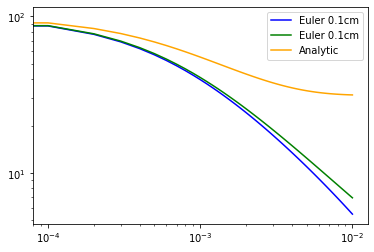

In [4]:
plot1 = rk2_1d(100,0,0.01,.0001,dn(1))
plot2 = rk2_1d(100,0,0.01,.0001,dn(10))
plot3 = rk2_1d(100,0,0.01,.0001,dn(100))


#Plotting all on the big plot
plt.plot(plot1[0], plot1[1], color = "blue", label = "Euler 0.1cm") 
plt.plot(plot2[0], plot2[1], color = "green", label = "Euler 0.1cm") 
plt.plot(plot3[0], plot3[1], color = "orange", label = "Analytic") 

plt.yscale('log')
plt.xscale('log')

#Showing
plt.legend()
plt.show()

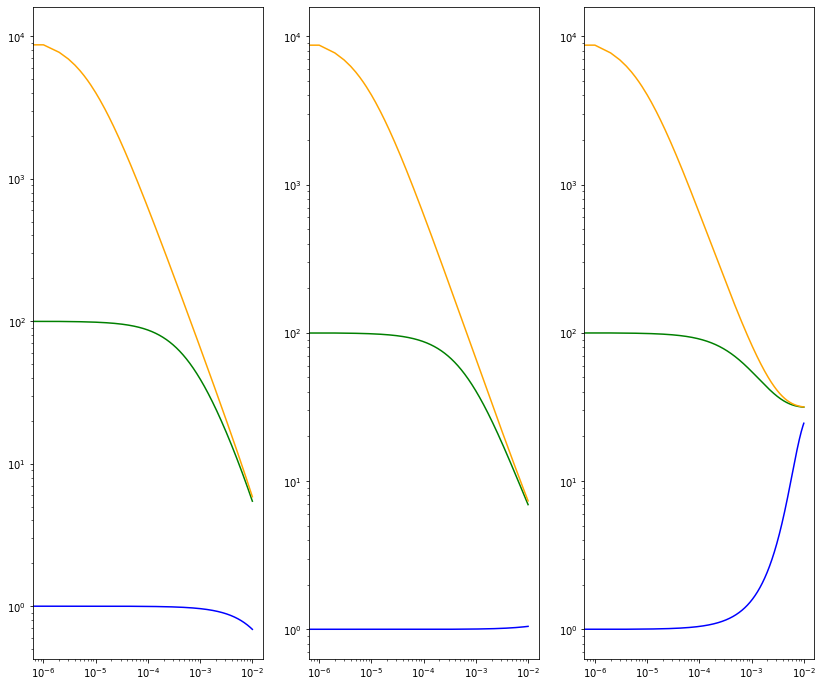

In [5]:
plot1_1 = rk2_1d(1,0,0.01,.000001,dn(1))
plot1_2 = rk2_1d(10**2,0,0.01,.000001,dn(1))
plot1_3 = rk2_1d(10**4,0,0.01,.000001,dn(1))

plot2_1 = rk2_1d(1,0,0.01,.000001,dn(10))
plot2_2 = rk2_1d(10**2,0,0.01,.000001,dn(10))
plot2_3 = rk2_1d(10**4,0,0.01,.000001,dn(10))

plot3_1 = rk2_1d(1,0,0.01,.000001,dn(100))
plot3_2 = rk2_1d(10**2,0,0.01,.000001,dn(100))
plot3_3 = rk2_1d(10**4,0,0.01,.000001,dn(100))


gridsize = (1,3)
fig = plt.figure(figsize=(14, 12))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))
ax3 = plt.subplot2grid(gridsize, (0, 2))


ax1.plot(plot1_1[0], plot1_1[1], color = "blue", label = "Euler 0.1cm") 
ax1.plot(plot1_2[0], plot1_2[1], color = "green", label = "Euler 0.1cm") 
ax1.plot(plot1_3[0], plot1_3[1], color = "orange", label = "Analytic") 
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2.plot(plot2_1[0], plot2_1[1], color = "blue", label = "Euler 0.1cm") 
ax2.plot(plot2_2[0], plot2_2[1], color = "green", label = "Euler 0.1cm") 
ax2.plot(plot2_3[0], plot2_3[1], color = "orange", label = "Analytic") 
ax2.set_xscale('log')
ax2.set_yscale('log')

ax3.plot(plot3_1[0], plot3_1[1], color = "blue", label = "Euler 0.1cm") 
ax3.plot(plot3_2[0], plot3_2[1], color = "green", label = "Euler 0.1cm") 
ax3.plot(plot3_3[0], plot3_3[1], color = "orange", label = "Analytic") 
ax3.set_xscale('log')
ax3.set_yscale('log')

plt.show()

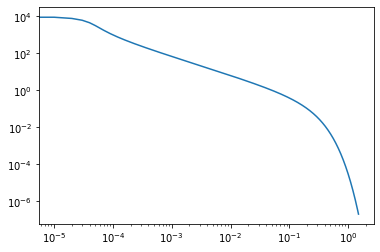

In [47]:
plot1_1 = rk2_1d(10000,0,1.5,.00001,dn(4))
plt.plot(plot1_1[0], plot1_1[1])
plt.xscale('log')
plt.yscale('log')
